# Red Wine Quality Prediction Project

##### Project Description
**The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).**

**This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.**

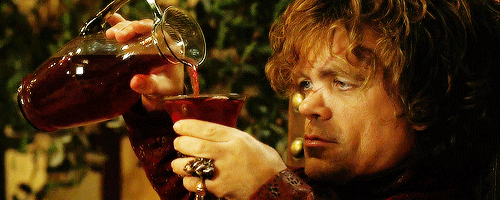

**Python Implementation**

Importing necessary libraries

In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing dataset

data = pd.read_csv('winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
data.shape 

(1599, 12)

In [4]:
# Checking for missing values

data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Checking the correlation :

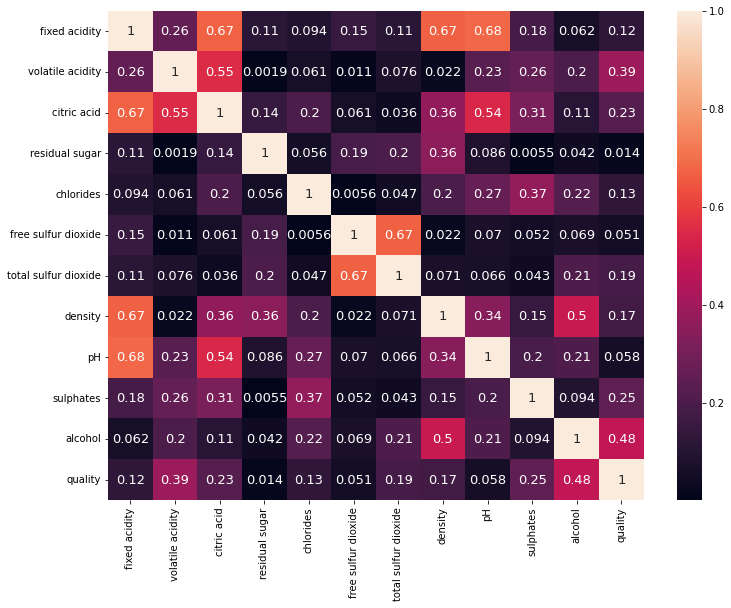

In [6]:
df_corr = data.corr().abs() # This code will get the coefficient of one variable vs all other variable

plt.figure(figsize=(12,9))
sns.heatmap(df_corr, annot=True, annot_kws={'size':13})
plt.show()

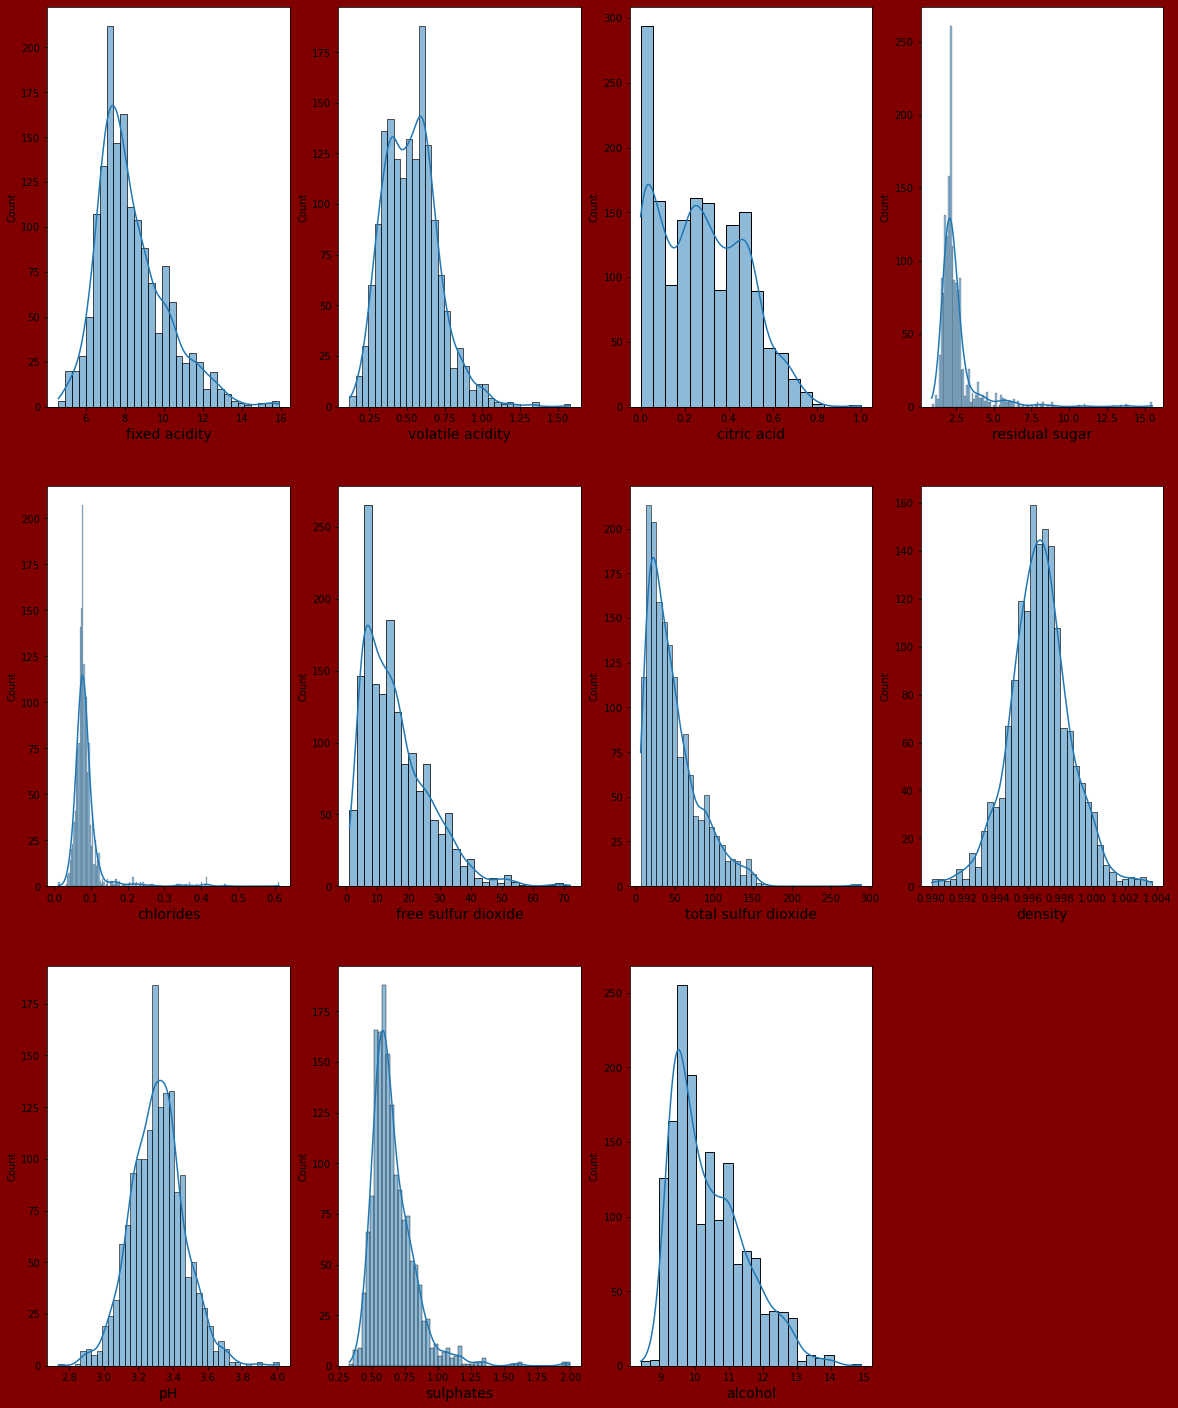

In [40]:
plt.figure(figsize=(20, 25), facecolor='maroon')

plotnumber = 1

for column in data.columns:
    if plotnumber <= 11:    
        ax = plt.subplot(3, 4, plotnumber)
        sns.histplot(data[column], kde=True)
        plt.xlabel(column, fontsize=14)
    plotnumber += 1

plt.show()

In [10]:
df_feature = data

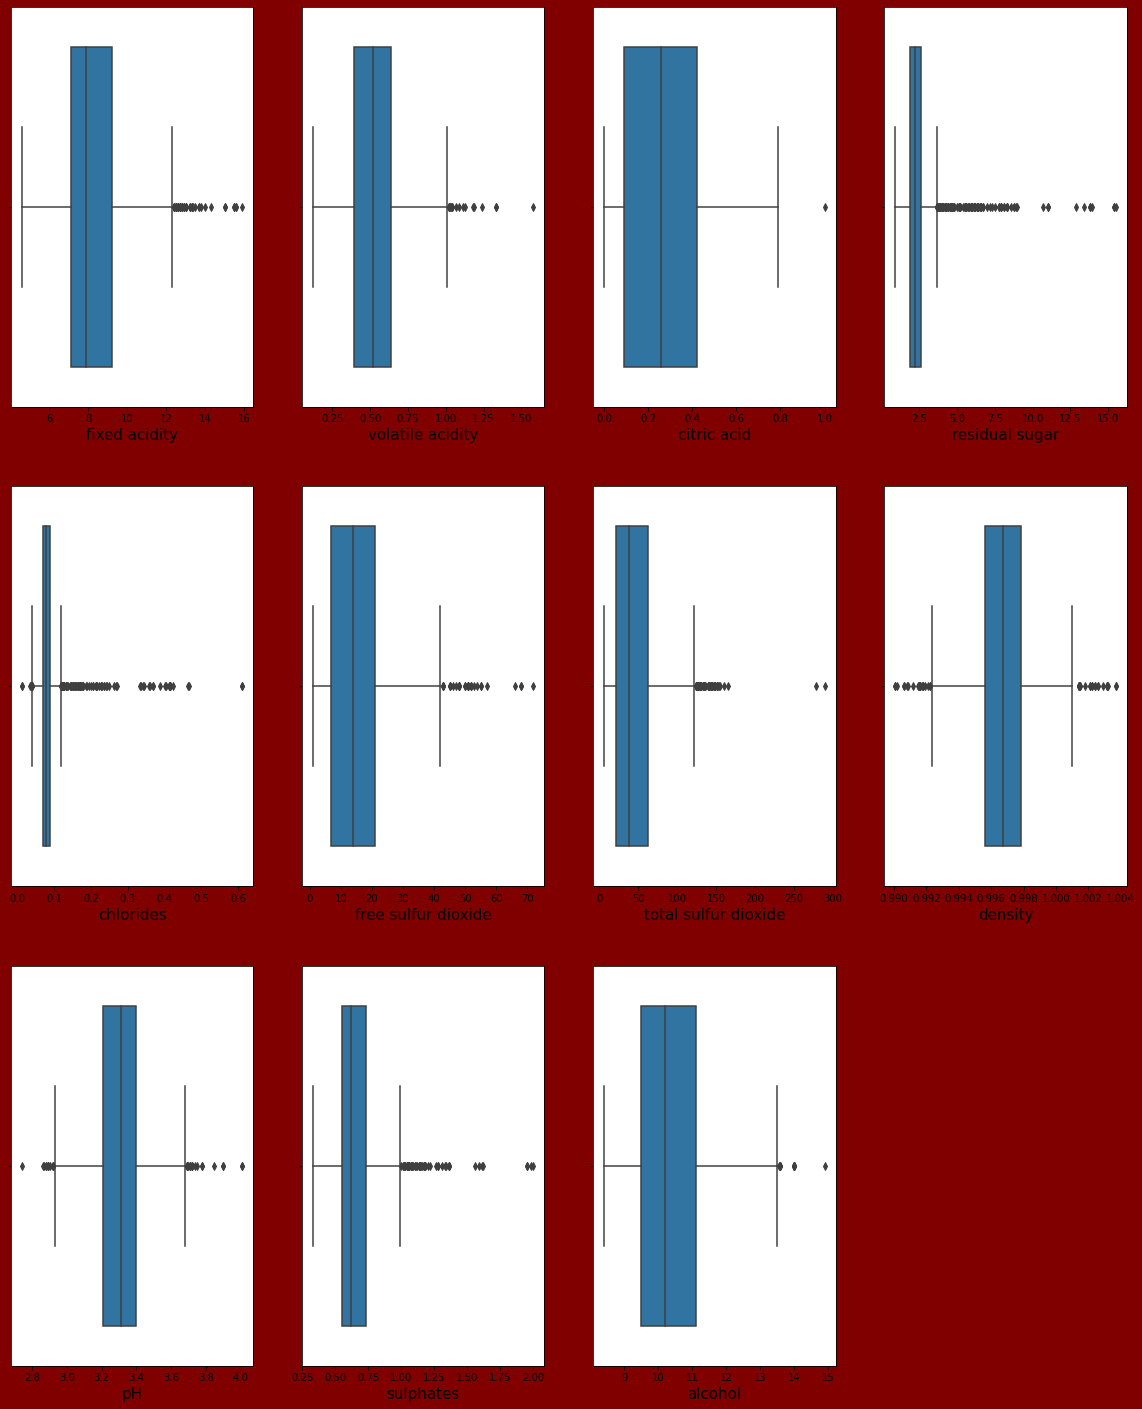

In [41]:
plt.figure(figsize=(20, 25), facecolor='maroon')
graph = 1

for column in df_feature:
    if graph <= 11:
        plt.subplot(3, 4, graph)
        ax = sns.boxplot(x=df_feature[column])
        plt.xlabel(column, fontsize=15)
    graph += 1
plt.show()

In [28]:
# Scaling the data

scaler = StandardScaler()
X = scaler.fit_transform(data.iloc[:, :-1])
y = data.iloc[:, -1]

In [29]:
# Split the dataset into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Perform feature selection using Recursive Feature Elimination
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

estimator = LogisticRegression(solver='lbfgs', max_iter=5000)
selector = RFE(estimator, n_features_to_select=5, step=1)
selector = selector.fit(X_train, y_train)

# Print the selected features
print("Selected Features:")
for i in range(len(selector.support_)):
    if selector.support_[i]:
        print(data.columns[i])

Selected Features:
volatile acidity
chlorides
total sulfur dioxide
sulphates
alcohol


In [31]:
clf = LogisticRegression(solver='lbfgs', max_iter=5000)
clf.fit(X_train[:, selector.support_], y_train)

LogisticRegression(max_iter=5000)

In [32]:
y_pred = clf.predict(X_test[:, selector.support_])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.5625
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0  11   6   0   0]
 [  0   0 148  47   0   0]
 [  0   0  77 108  15   0]
 [  0   0   4  43  14   0]
 [  0   0   0   2   4   0]]
Classification Report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        17
           5       0.61      0.76      0.68       195
           6       0.52      0.54      0.53       200
           7       0.42      0.23      0.30        61
           8       0.00      0.00      0.00         6

    accuracy                           0.56       480
   macro avg       0.26      0.25      0.25       480
weighted avg       0.52      0.56      0.54       480



# Model Accuracy: 56%

In [33]:
# Define hyperparameters to tune
grid_param = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 500, 1000]
}

In [34]:
# Create an instance of Logistic Regression
lr = LogisticRegression()

In [35]:
# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=lr,
                           param_grid=grid_param,
                           cv=5,
                           n_jobs=-1)

In [36]:
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10], 'max_iter': [100, 500, 1000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [37]:
# Print the best hyperparameters and the corresponding accuracy score
print("Best hyperparameters:", grid_search.best_params_)
print("Accuracy score:", grid_search.best_score_)

Best hyperparameters: {'C': 1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}
Accuracy score: 0.6131085842408712


When we tune all the parameters there is good chance that, we can improve the accuracy.

# Model Accuracy: 61%

# Conclusion:

**Based on the analysis performed on the Vinho Verde wine dataset, a classification model was built to predict the quality of wine based on its physicochemical properties. The model achieved an accuracy of 61%, which suggests that it is only slightly better than random chance in predicting the quality of wine.**

**The results indicate that the dataset may be more complex than initially anticipated, and additional features or more advanced modeling techniques may be necessary to improve performance. It may also be beneficial to explore the relevance of the input variables, as some may not be as informative as others.**

**In conclusion, while the classification model showed some ability to predict wine quality based on the available features, it did not perform particularly well. Further investigation and refinement of the model are necessary to improve its accuracy and usefulness for practical applications.**